In [9]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.quantum_info import Operator
import numpy as np
from qiskit.visualization import plot_histogram
print('done!')

done!


In [10]:
# Oracle for target |1100> in the  4-qubit searching case
oracle_matrix = np.identity(2**4)
oracle_matrix[12, 12] = -1

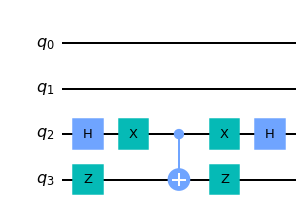

In [11]:
# local diffuser for the last two qubits
localdiffuser1 = QuantumCircuit(4)
localdiffuser1.h(2)
localdiffuser1.x(2)
localdiffuser1.z(3)
localdiffuser1.cx(2,3)
localdiffuser1.z(3)
localdiffuser1.x(2)
localdiffuser1.h(2)
localdiffuser1.draw('mpl')

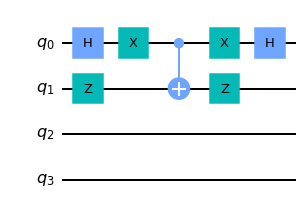

In [12]:
# local diffuser for the first two qubits
localdiffuser2 = QuantumCircuit(4)
localdiffuser2.h(0)
localdiffuser2.x(0)
localdiffuser2.z(1)
localdiffuser2.cx(0,1)
localdiffuser2.z(1)
localdiffuser2.x(0)
localdiffuser2.h(0)
localdiffuser2.draw('mpl')

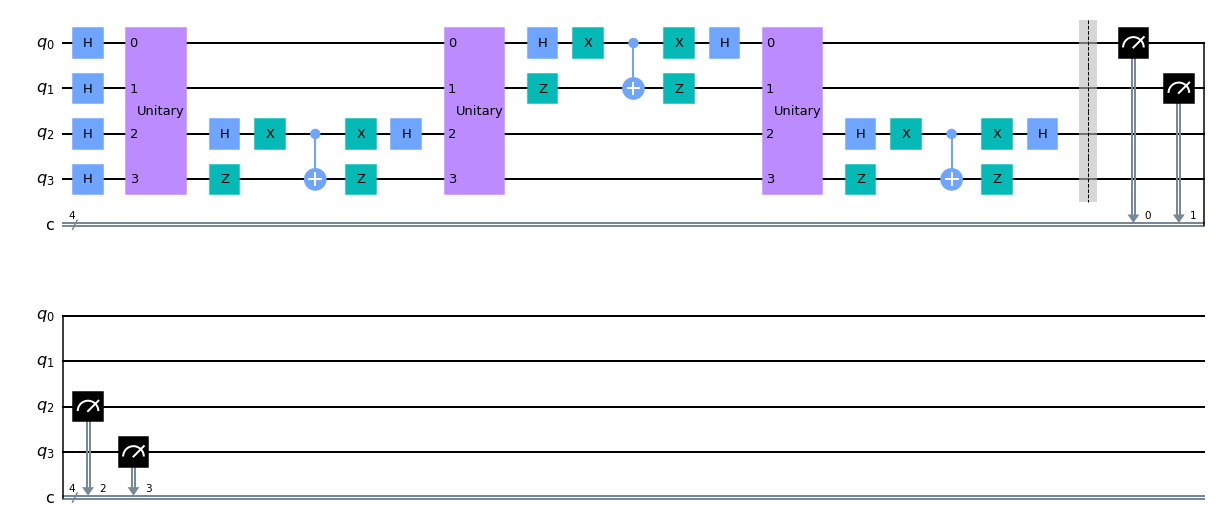

In [13]:
# Performing the 4-qubit hardware efficient quantum search algorithm considering the minimum number of iterations   
qc = QuantumCircuit(4,4)
qc.h(range(4))
# applying the oracle operator 
qc.unitary(Operator(oracle_matrix), range(4))
# applying the local diffusion operator for the last two qubits
qc = qc.compose(localdiffuser1)
# applying the oracle operator
qc.unitary(Operator(oracle_matrix), range(4))
# applying the local diffusion operator for the first two qubits
qc = qc.compose(localdiffuser2)
# applying the oracle operator 
qc.unitary(Operator(oracle_matrix), range(4))
# applying the local diffusion operator for the last two qubits
qc = qc.compose(localdiffuser1)

qc.barrier()      
qc.measure(range(4),range(4))      

qc.draw('mpl')

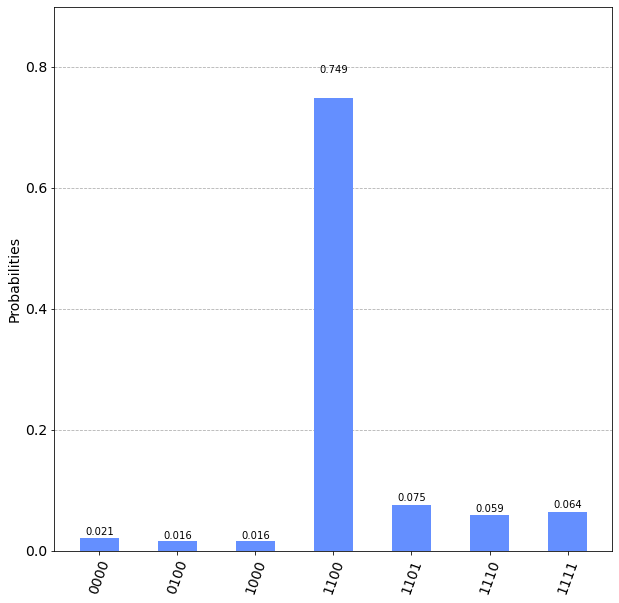

In [14]:
svsim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result()
plot_histogram(result.get_counts(),(10,10))